<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

from google.colab import files
upload = files.upload()

Saving diabetes75pc_100_times.csv to diabetes75pc_100_times (9).csv


In [ ]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

data = read_data("diabetes75pc_100_times.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,0,0,37.82,0.59,68,0
3,7,141,90,41,0,34.25,0.40,39,0
4,4,120,72,0,0,29.12,0.39,46,1


In [ ]:
# Dataset dimensions - (rows, columns)
data.shape

(77568, 9)

In [ ]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77568 entries, 0 to 77567
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               77568 non-null  int64  
 1   Glucose                   77568 non-null  int64  
 2   BloodPressure             77568 non-null  int64  
 3   SkinThickness             77568 non-null  int64  
 4   Insulin                   77568 non-null  int64  
 5   BMI                       77568 non-null  float64
 6   DiabetesPedigreeFunction  77568 non-null  float64
 7   Age                       77568 non-null  int64  
 8   Outcome                   77568 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 5.3 MB


In [ ]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,77568.0,3.845516,3.369130,0.000,1.00,3.00,6.00,18.00
Glucose,77568.0,124.884488,33.202236,0.000,102.00,121.00,145.00,213.00
BloodPressure,77568.0,69.105469,19.343326,0.000,62.00,72.00,80.00,122.00
SkinThickness,77568.0,20.536458,15.941931,0.000,0.00,23.00,32.00,99.00
Insulin,77568.0,79.799479,115.169692,0.000,0.00,30.50,127.25,846.00
BMI,77568.0,33.181591,8.205376,0.000,28.14,33.23,37.91,72.12
DiabetesPedigreeFunction,77568.0,0.489430,0.343634,0.078,0.25,0.39,0.65,2.60
Age,77568.0,33.240885,11.752648,21.000,24.00,29.00,41.00,81.00
Outcome,77568.0,0.348958,0.476644,0.000,0.00,0.00,1.00,1.00


In [ ]:
#statistics description of the data
data.describe([0.10,0.25,0.5,0.75,0.9,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,77568.0,3.845516,3.369130,0.000,0.000,1.00,3.00,6.00,9.00,10.00,13.0000,18.00
Glucose,77568.0,124.884488,33.202236,0.000,88.000,102.00,121.00,145.00,173.00,188.00,203.0000,213.00
BloodPressure,77568.0,69.105469,19.343326,0.000,54.000,62.00,72.00,80.00,88.00,90.00,106.0000,122.00
SkinThickness,77568.0,20.536458,15.941931,0.000,0.000,0.00,23.00,32.00,40.00,44.00,52.0000,99.00
Insulin,77568.0,79.799479,115.169692,0.000,0.000,0.00,30.50,127.25,210.00,293.00,540.0000,846.00
BMI,77568.0,33.181591,8.205376,0.000,24.417,28.14,33.23,37.91,43.12,46.19,53.1733,72.12
DiabetesPedigreeFunction,77568.0,0.489430,0.343634,0.078,0.170,0.25,0.39,0.65,0.91,1.17,1.7600,2.60
Age,77568.0,33.240885,11.752648,21.000,22.000,24.00,29.00,41.00,51.00,58.00,67.0000,81.00
Outcome,77568.0,0.348958,0.476644,0.000,0.000,0.00,0.00,1.00,1.00,1.00,1.0000,1.00


In [ ]:
# Count of null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


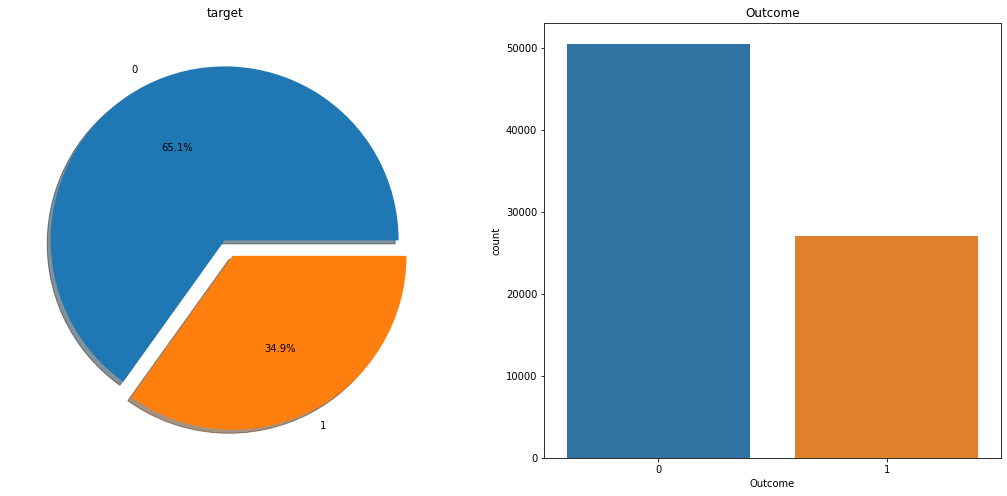

In [ ]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
print(data["Outcome"].value_counts()*100/len(data))



0    65.104167
1    34.895833
Name: Outcome, dtype: float64


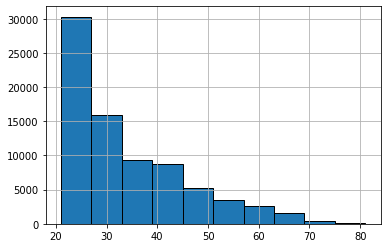

In [ ]:
data["Age"].hist(edgecolor= "black")
plt.show()


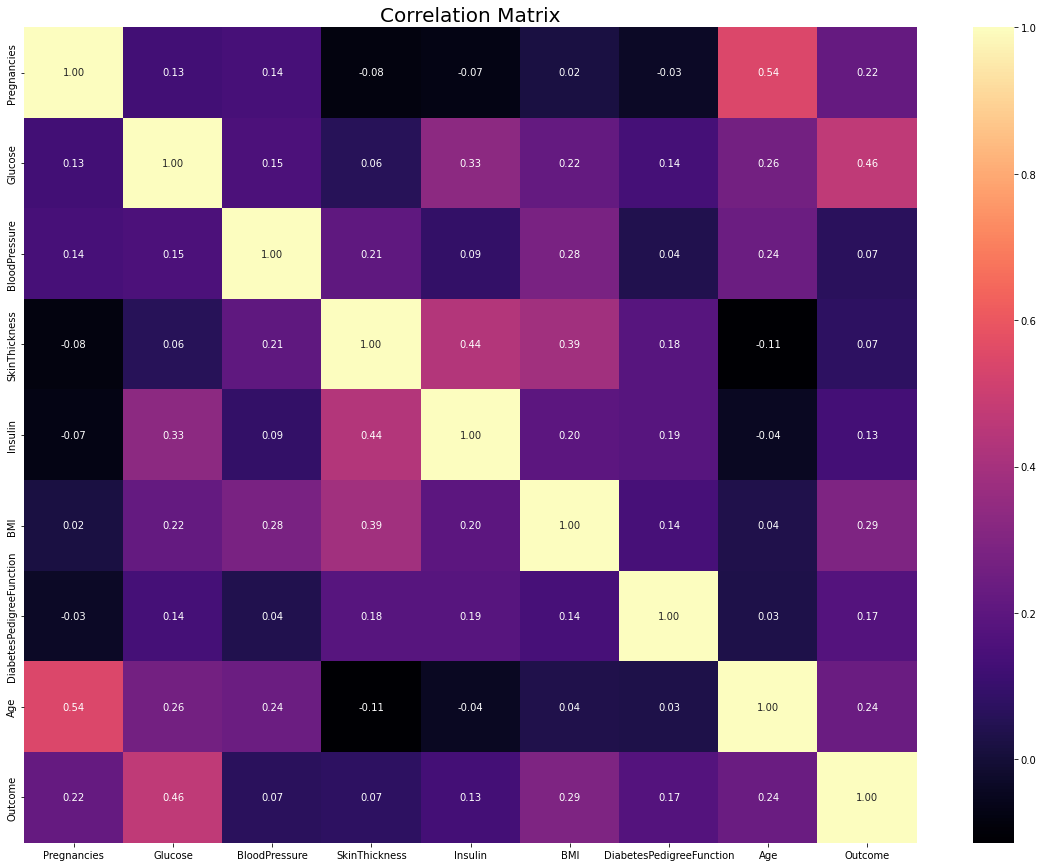

In [ ]:
def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    '''corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
    '''
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)

plot_corr(data)

In [ ]:
'''
  2 - preprocessing Data : 
    a - replace 0 in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
'''
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,0,0,37.82,0.59,68,0
3,7,141,90,41,0,34.25,0.40,39,0
4,4,120,72,0,0,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91,58,11,54,26.26,0.27,22,0
77564,2,112,62,32,56,26.40,0.13,21,0
77565,4,128,68,0,0,36.47,0.40,29,0
77566,1,101,68,21,0,28.56,1.11,22,0


In [741]:
replace_list_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

data_new = data
data_new[replace_list_column] = data[replace_list_column].replace(0, np.NaN)

#for i in data.index:
#print(data.loc[data['Insulin'].isin([0,2,4])])
import random

max_Insulin = data['Insulin'].max()
min_Insulin = data['Insulin'].min()

data_new.Insulin = data_new['Insulin'].mask(data_new['Insulin'].isnull(), np.random.uniform(min_Insulin, max_Insulin, size=data_new['Insulin'].shape))

data_new = data_new.dropna(axis=0, how='any')

data_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129.0,70.0,18.0,122.000000,29.43,1.17,45,1
1,1,205.0,76.0,36.0,249.000000,37.28,0.92,29,1
3,7,141.0,90.0,41.0,340.608587,34.25,0.40,39,0
5,5,80.0,82.0,41.0,42.000000,36.74,0.16,35,0
6,1,90.0,66.0,23.0,94.000000,29.59,0.17,21,0
...,...,...,...,...,...,...,...,...,...
77561,0,196.0,82.0,14.0,185.000000,32.20,0.72,22,1
77562,2,75.0,70.0,27.0,765.327428,30.10,0.62,22,0
77563,3,91.0,58.0,11.0,54.000000,26.26,0.27,22,0
77564,2,112.0,62.0,32.0,56.000000,26.40,0.13,21,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


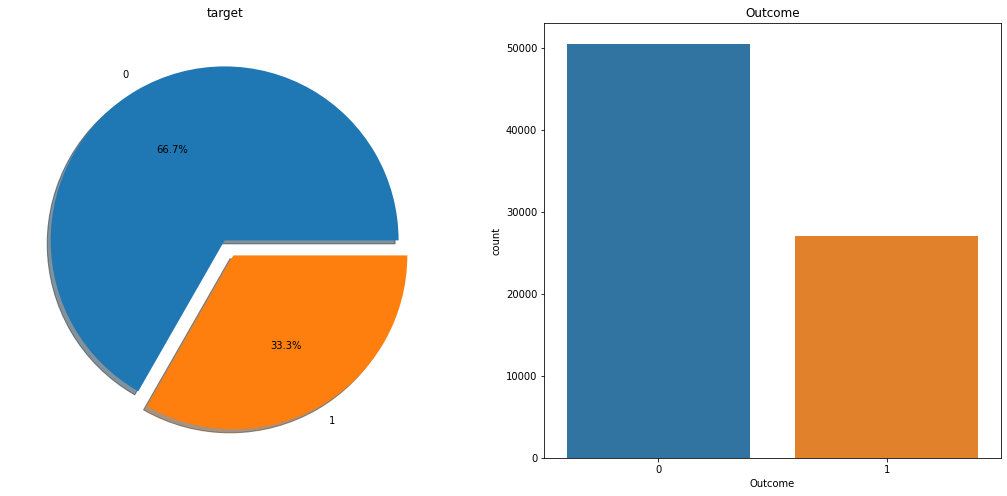

In [742]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_new['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

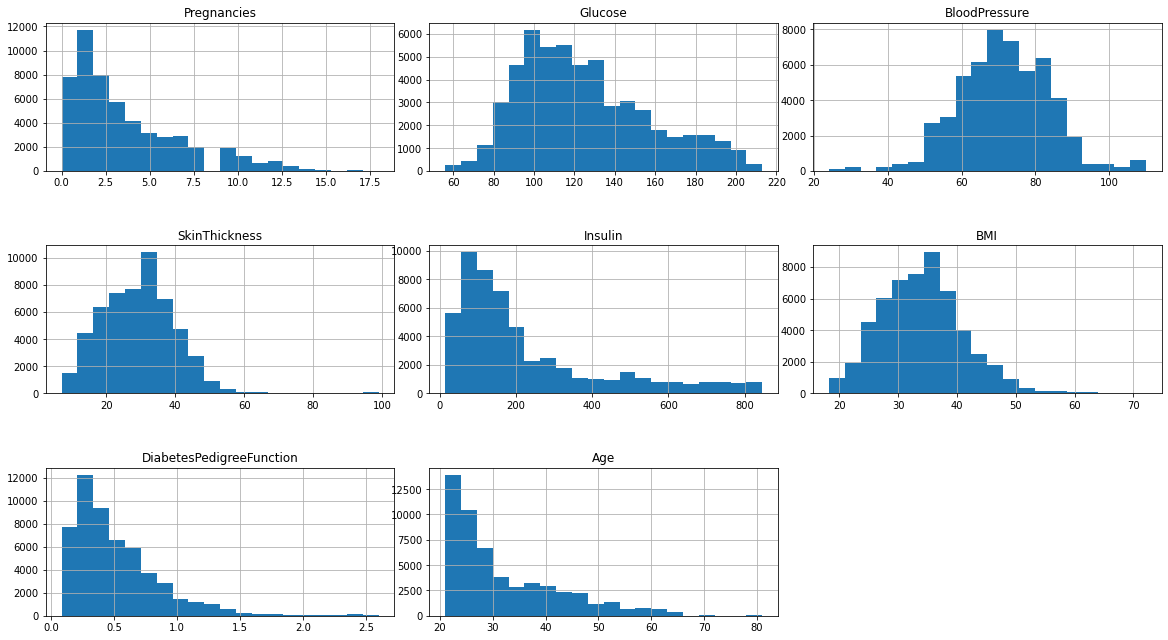

In [743]:
# Histogram of each feature
import itertools

col = data_new.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    data_new[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [745]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(data_new)

In [749]:
dataset_scaled = pd.DataFrame(dataset_scaled)
dataset_scaled

,0,1,2,3,4,5,6,7,8
0,0.222222,0.464968,0.534884,0.119565,0.129808,0.208272,0.431412,0.400000,1.0
1,0.055556,0.949045,0.604651,0.315217,0.282452,0.353858,0.332008,0.133333,1.0
2,0.388889,0.541401,0.767442,0.369565,0.392558,0.297663,0.125249,0.300000,0.0
3,0.277778,0.152866,0.674419,0.369565,0.033654,0.343843,0.029821,0.233333,0.0
4,0.055556,0.216561,0.488372,0.173913,0.096154,0.211239,0.033797,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
53727,0.000000,0.891720,0.674419,0.076087,0.205529,0.259644,0.252485,0.016667,1.0
53728,0.111111,0.121019,0.534884,0.217391,0.903038,0.220697,0.212724,0.016667,0.0
53729,0.166667,0.222930,0.395349,0.043478,0.048077,0.149481,0.073559,0.016667,0.0
53730,0.111111,0.356688,0.441860,0.271739,0.050481,0.152077,0.017893,0.000000,0.0


In [750]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [752]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = data_new['Outcome'] )

In [753]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (42985, 4)
X_test shape: (10747, 4)
Y_train shape: (42985,)
Y_test shape: (10747,)


DATA MODELLING


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0.9899506839117893
0.9888340932353215
0.9872522564436587
0.9853912719828789
0.9836233367451381
0.9814832046152414
0.9787847771471109
0.9762724481250582
0.9744114636642784
0.9723643807574207
0.9692007071740951
0.9674327719363544
0.9668744765981204
0.9653856890294966
0.9645482460221457
0.962873360007444
0.9614776216618591
0.9611054247697032
0.9602679817623523
0.9582208988554946
0.9571973574020657
0.9557085698334419
0.954778077603052
0.9535684377035452
0.9521726993579603
0.9516144040197264
0.9509630594584535
0.9505908625662975
0.9495673211128687
0.9489159765515958
0.9482646319903228
0.947148041313855
0.94668279519866
0.9460314506373871
0.9448218107378803
0.9444496138457243
0.9445426630687633
0.9440774169535684
0.9436121708383735
0.9435191216153345
0.9433330231692565
0.9431469247231785
0.9428677770540616
0.9427747278310226
0.9419372848236717
0.9419372848236717
0.9412859402623988
0.9410067925932818


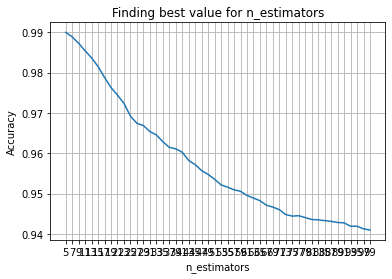

Highest value:  0.9899506839117893


In [765]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(5, 100, 2))
acc = pd.Series()
x = range(5, 100, 2)

for i in list(range(5, 100, 2)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    print(metrics.accuracy_score(prediction, Y_test))
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())